In [1]:
import sys
import pickle
import matplotlib.pyplot
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from tester import test_classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from time import time

In [2]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
for name in data_dict:
    print name

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HORTON STANLEY C
PIPER GREGORY F
HUMPHREY GENE E
UMANOFF ADAM S
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
MCCARTY DANNY J
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUC

In [4]:
len(data_dict)

146

In [5]:
data_dict['FITZGERALD JAY L']

{'bonus': 350000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'jay.fitzgerald@enron.com',
 'exercised_stock_options': 664461,
 'expenses': 23870,
 'from_messages': 16,
 'from_poi_to_this_person': 1,
 'from_this_person_to_poi': 8,
 'loan_advances': 'NaN',
 'long_term_incentive': 556416,
 'other': 285414,
 'poi': False,
 'restricted_stock': 956775,
 'restricted_stock_deferred': 'NaN',
 'salary': 199157,
 'shared_receipt_with_poi': 723,
 'to_messages': 936,
 'total_payments': 1414857,
 'total_stock_value': 1621236}

In [6]:
# Remove Outliers
data_dict.pop("TOTAL")
data_dict.pop("THE TRAVEL AGENCY IN THE PARK")
data_dict.pop("LOCKHART EUGENE E")

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

In [7]:
len(data_dict)

143

In [8]:
def get_quantifiable_count(key, is_poi = None):
    count = 0
    for k, v in data_dict.items():
        if is_poi is not None:
            if v[key] != 'NaN' and v['poi'] == is_poi:
                count += 1
        else:
            if v[key] != 'NaN':
                count += 1
    return count

poi_count = get_quantifiable_count('poi', True)
non_poi_count = get_quantifiable_count('poi', False)

poi_count

18

In [9]:
# Create New Features
for name in data_dict:
    data_point = data_dict[name]
    
    if data_point['bonus']!= 'NaN' and data_point['salary'] != 'NaN' and data_point['salary'] != 0:
        #bonus to salary ratio
        bonus = float(data_point['bonus'])
        salary = float(data_point['salary'])
        data_point["bonus to salary ratio"] = bonus/salary
    else:
        data_point["bonus to salary ratio"] ='NaN'
        
        
    
    if data_point['to_messages'] != 'NaN' and  data_point['from_messages'] != 'NaN' and data_point['from_poi_to_this_person'] != 'NaN' and data_point['from_this_person_to_poi'] != 'NaN':
        to_messages = float(data_point['to_messages'])
        from_messages = float(data_point['from_messages'])
        from_poi = float(data_point['from_poi_to_this_person'])
        to_poi = float(data_point['from_this_person_to_poi'])

        data_point['from_poi_to_this_person_ratio'] = from_poi / to_messages
        data_point['from_this_person_to_poi_ratio'] = to_poi / from_messages
        #data_point['Total POI Interaction Ratio'] = (from_poi + to_poi)/total_messages
    
    else:
        data_point['from_poi_to_this_person_ratio'] = "NaN"
        data_point['from_this_person_to_poi_ratio'] = "NaN"
        #data_point['Total POI Interaction Ratio'] = "NaN"

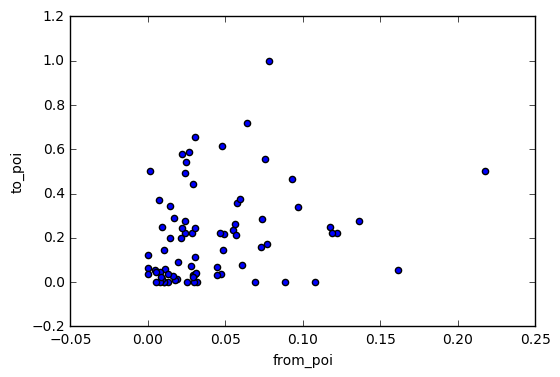

In [10]:
features = ['from_poi_to_this_person_ratio','from_this_person_to_poi_ratio']
data = featureFormat(data_dict, features)

for point in data:
    from_poi = point[0]
    to_poi = point[1]
    matplotlib.pyplot.scatter(from_poi, to_poi )

matplotlib.pyplot.xlabel("from_poi")
matplotlib.pyplot.ylabel("to_poi")
matplotlib.pyplot.show()

There are a few outliers: one that has very high poi_ratio and low bonus_salary_ratio, and three that has low poi_ratio and high bonus_salary_ratio. I predict that either one of them is a poi.

# Feature Selection

In [20]:
my_dataset = data_dict
features_list = ['poi','bonus to salary ratio', 'salary', 'bonus',
                'from_poi_to_this_person_ratio', 'from_this_person_to_poi_ratio',
                 'from_poi_to_this_person','from_this_person_to_poi',
                 'deferral_payments', 'total_payments', 'loan_advances', 
                 'restricted_stock_deferred', 'deferred_income', 
                 'total_stock_value', 'expenses', 'exercised_stock_options', 
                 'long_term_incentive', 'restricted_stock', 'director_fees',
                  'shared_receipt_with_poi'] 
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

#Splitting the data using Stratified Shuffle Split
from sklearn.cross_validation import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(labels, 1000, test_size = 0.3, random_state = 42)
# sss.get_n_splits(features, labels)
for train_index, test_index in sss:
    #print("TRAIN:", train_index, "TEST:", test_index)
    features_train, features_test = [features[i] for i in train_index], [features[i] for i in test_index]
    labels_train, labels_test = [labels[i] for i in train_index],[labels[i] for i in test_index]

In [21]:
#Using the features_list above
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
acc=accuracy_score(labels_test, pred)
print test_classifier(clf, my_dataset, features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
	Accuracy: 0.81180	Precision: 0.28623	Recall: 0.27550	F1: 0.28076	F2: 0.27758
	Total predictions: 15000	True positives:  551	False positives: 1374	False negatives: 1449	True negatives: 11626

None


Precision score is 0.286 and Recall is 0.275. They're not enough for the threshold. Let me use SelectKBest and feature importance from Decision trees to select better features.

### SelectKBest and Decision Trees

In [22]:
X_new = SelectKBest(f_classif, k = 5)
X_new.fit_transform(features_train, labels_train)
# Get SelectKBest scores, rounded to 2 decimal places, name them "feature_scores"
feature_scores = ['%.2f' % elem for elem in X_new.scores_ ]
# Get SelectKBest pvalues, rounded to 3 decimal places, name them "feature_scores_pvalues"
feature_scores_pvalues = ['%.3f' % elem for elem in  X_new.pvalues_ ]
# Get SelectKBest feature names, whose indices are stored in 'X_new.get_support',
# create a tuple of feature names, scores and pvalues, name it "features_selected_tuple"
features_selected_tuple=[(features_list[i+1], feature_scores[i], feature_scores_pvalues[i]) for i in X_new.get_support(indices=True)]

# Sort the tuple by score, in reverse order
features_selected_tuple = sorted(features_selected_tuple, key=lambda feature: float(feature[1]) , reverse=True)

# Print
print ' '
print 'Selected Features, Scores, P-Values'
print features_selected_tuple

 
Selected Features, Scores, P-Values
[('salary', '16.47', '0.000'), ('from_this_person_to_poi_ratio', '12.07', '0.001'), ('total_stock_value', '9.50', '0.003'), ('exercised_stock_options', '8.87', '0.004'), ('bonus', '8.82', '0.004')]


I will use the features selected by SelectKBest.

In [23]:
my_dataset = data_dict
features_list = ['poi','salary', 'from_this_person_to_poi_ratio', 
                 'total_stock_value', 'exercised_stock_options', 'bonus']
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

#Splitting the data using Stratified Shuffle Split
from sklearn.cross_validation import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(labels, 1000, test_size = 0.3, random_state = 1)

for train_index, test_index in sss:
    #print("TRAIN:", train_index, "TEST:", test_index)
    features_train, features_test = [features[i] for i in train_index], [features[i] for i in test_index]
    labels_train, labels_test = [labels[i] for i in train_index],[labels[i] for i in test_index]

### Decision Trees

In [24]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
acc=accuracy_score(labels_test, pred)
print test_classifier(clf, my_dataset, features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
	Accuracy: 0.78757	Precision: 0.28863	Recall: 0.33250	F1: 0.30901	F2: 0.32269
	Total predictions: 14000	True positives:  665	False positives: 1639	False negatives: 1335	True negatives: 10361

None


In [25]:
#Decision Trees
parameters = {'min_samples_split':[2,3,4,5,6,7,8,9,10], 'criterion':("gini", 'entropy'), 
              'max_depth':[None,1,2,3,4,5,6,7,8,9], 'splitter':['best', 'random'],
              'class_weight':[None, 'balanced'], 'min_samples_leaf':[1,2,3,4,5,6] }
dtree = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(dtree, parameters)
clf.fit(features_train,labels_train)
print clf.best_params_

{'splitter': 'random', 'min_samples_leaf': 1, 'criterion': 'gini', 'min_samples_split': 2, 'max_depth': 2, 'class_weight': None}


In [30]:
clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf = 1, criterion= 'gini', 
                             max_depth=2, splitter ='random',random_state=42)
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
acc=accuracy_score(labels_test, pred)
print "Decision Tree Results"
print test_classifier(clf, my_dataset, features_list)

Decision Tree Results
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='random')
	Accuracy: 0.85821	Precision: 0.53086	Recall: 0.06450	F1: 0.11502	F2: 0.07825
	Total predictions: 14000	True positives:  129	False positives:  114	False negatives: 1871	True negatives: 11886

None


I used SelectKBest to select the features and used GridSearch tp select parameters of Decision Tree classifier. For the parameters GridSearch picked: ['splitter': 'random', 'min_samples_leaf': 2, 'criterion': 'gini', 'min_samples_split': 2, 'max_depth': 5, 'class_weight': None]. I used those parameters in Decision Tree and while precision score is above 0.3 threshold, the recall score is not(0.1).

### KNN 

In [27]:
t0 = time()
clf2 = KNeighborsClassifier(n_neighbors=3)
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)
#pca = PCA(n_components=4)
#pca_transform_train = pca.fit_transform(features_train_scaled)
#pca_transform_test = pca.fit_transform(features_test_scaled)
clf2.fit(features_train_scaled,labels_train)
score = clf2.score(features_test_scaled,labels_test)
pred = clf2.predict(features_test_scaled)
print("done in %0.3fs" % (time() - t0))

from sklearn.metrics import accuracy_score
acc=accuracy_score(pred, labels_test)

print "Validating algorithm:"
print "accuracy after tuning = ", acc
print test_classifier(clf2, my_dataset, features_list)

done in 0.068s
Validating algorithm:
accuracy after tuning =  0.825
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.87429	Precision: 0.61928	Recall: 0.31150	F1: 0.41450	F2: 0.34588
	Total predictions: 14000	True positives:  623	False positives:  383	False negatives: 1377	True negatives: 11617

None


### Naive Bayes (final algorithm)

In [28]:
clf3 = GaussianNB()
clf3.fit(features_train, labels_train)
pred = clf3.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print test_classifier(clf3, my_dataset, features_list)
print accuracy

#print "NB algorithm time:", round(time()-t0, 3), "s"

GaussianNB()
	Accuracy: 0.85629	Precision: 0.49545	Recall: 0.32650	F1: 0.39361	F2: 0.35040
	Total predictions: 14000	True positives:  653	False positives:  665	False negatives: 1347	True negatives: 11335

None
0.875
